### Steps in Modelling

1. Creating a model
2. Compiling a model
   1. Defining a loss function
   2. Setting up an optimizer
   3. Creating evaluation metrics
3. Fitting a model

* Evaluating a model
    - Visualizing the model
    - Looking at training curves
    - Compare predictions to the ground truth

- Saving a model
- Loading a model

### Typical architecture of regression neural network


- Input layer shape - same as shape
- Hidden layer - min=1, max=unlimited
- Neuron per hidden layer - generally 10 to 100
- Output layer shape - same shape as desired prediction shape
- Hidden activation - Usually ReLU(rectified linear unit)
- Output activation - Nonne, ReLU, logistic/tanh
- Loss function - MSE, MAE, Huber(combination of MSE and MAE)
- Optimizer - SGD, Adam

### Creating data to view and fit

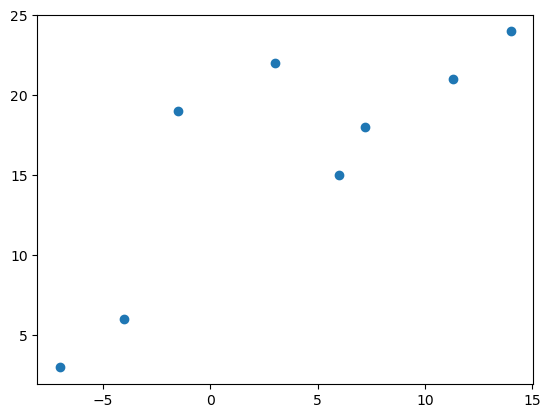

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([-7.0,-4.0,-1.5,3.0,6.0,7.2,11.3,14.0])
# Create labels
y = np.array([3.0, 6.0, 19.0, 22.0, 15.0, 18.0, 21.0, 24.0])
plt.scatter(X,y)

### Input and Output shapes


### Steps in modelling with Tensorflow

1. Creating a model-piece together the layers of a neural network (using the Functional or Sequential API) or import a previously build model(known as transfer learning)